## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
import tensorflow as tf

In [3]:
!unzip /content/drive/MyDrive/CNNproject/DogBreed_Classification-20210609T072614Z-001.zip 

Archive:  /content/drive/MyDrive/CNNproject/DogBreed_Classification-20210609T072614Z-001.zip
  inflating: DogBreed_Classification/labels.csv.zip  
  inflating: DogBreed_Classification/sample_submission.csv.zip  
  inflating: DogBreed_Classification/train.zip  
  inflating: DogBreed_Classification/test.zip  


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [4]:
project_path = "/content/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [5]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [6]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [7]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [8]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [5]:
label_df = pd.read_csv("/content/labels.csv")

In [6]:
label_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [ ]:
label_df['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

There are 120 different breed out of which scottish_deerhound has 126 image and briard has 66 image

### Get one-hot encodings of labels

In [7]:
Y = pd.get_dummies(label_df.breed,sparse = True)
#Y = to_categorical(label_df.breed, num_classes= 120)

In [8]:
Y.shape

(10222, 120)

In [9]:
y= np.asarray(Y)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [10]:
img_row = 128
img_col = 128
num_channel = 3

In [11]:
x_train=[]
y_train = []


for f,img in tqdm(label_df.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img, (img_row,img_col))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:28<00:00, 356.42it/s]


schipperke


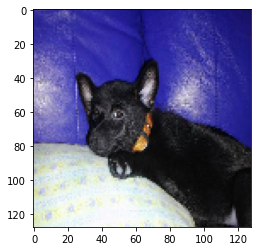

In [12]:
import matplotlib.pyplot as plt
print(y_train[1555])
plt.imshow(x_train[1555])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [15]:
x_Train = np.array(x_train).astype('float32')

In [16]:
x_Train = x_Train/255

In [17]:
x_Train.shape

(10222, 128, 128, 3)

It has 4 dimensions already

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, Y_train,Y_val = train_test_split(x_Train, y, test_size = 0.2, random_state= 123)

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(8177, 128, 128, 3)
(8177, 120)
(2045, 128, 128, 3)
(2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [ ]:
sample = pd.read_csv('/content/sample_submission.csv', usecols = ['id'])

In [ ]:
test_img= sample['id']

In [ ]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [ ]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_row, img_col)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:13<00:00, 754.45it/s]


Normalize the test data and convert it into 4 dimensions

In [ ]:
x_test_feature_n = np.array(x_test_feature).astype('float32')
x_test_feature_n/=255

In [ ]:
x_test_feature_n.shape

(10357, 128, 128)

In [ ]:
X_test = tf.expand_dims(x_test_feature_n,-1)

In [ ]:
X_test.shape

TensorShape([10357, 128, 128, 1])

In [ ]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, BatchNormalization, MaxPool2D

In [23]:
tf.keras.backend.clear_session()

In [24]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (5,5), activation = 'relu', input_shape = (128,128,3)))
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu'))
model.add(Flatten())

In [25]:
model.add(Dense(256, activation = 'relu'))
model.add(Dense(120, activation = 'softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

### Use batch_size = 128 and epochs = 10 and execute the model

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_val,Y_val), epochs=10, batch_size = 128)

Epoch 1/10


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_gen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.2, vertical_flip = True,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3,)

In [ ]:
data_gen.fit(X_train)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [ ]:
train_generator = data_gen.flow(X_train, Y_train, batch_size=128)

In [ ]:
val_generator = data_gen.flow(X_val, Y_val, batch_size=128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [ ]:
model.fit_generator(train_generator, epochs = 10, validation_data = val_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
64/64 [==============================] - 34s 532ms/step - loss: 4.7730 - accuracy: 0.0143 - val_loss: 4.7573 - val_accuracy: 0.0161
Epoch 2/10
64/64 [==============================] - 33s 519ms/step - loss: 4.7667 - accuracy: 0.0147 - val_loss: 4.7855 - val_accuracy: 0.0127
Epoch 3/10
64/64 [==============================] - 33s 517ms/step - loss: 4.7644 - accuracy: 0.0142 - val_loss: 4.7527 - val_accuracy: 0.0220
Epoch 4/10
64/64 [==============================] - 33s 520ms/step - loss: 4.7319 - accuracy: 0.0171 - val_loss: 4.7288 - val_accuracy: 0.0205
Epoch 5/10
64/64 [==============================] - 33s 517ms/step - loss: 4.7163 - accuracy: 0.0181 - val_loss: 4.7119 - val_accuracy: 0.0235
Epoch 6/10
64/64 [==============================] - 33s 516ms/step - loss: 4.7057 - accuracy: 0.0191 - val_loss: 4.7149 - val_accuracy: 0.0225
Epoch 7/10
64/64 [==============================] - 33s 520ms/step - loss: 4.7161 - accuracy: 0.0179 - val_loss: 4.6790 - val_accuracy: 0.0210

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [39]:
from tensorflow.keras.applications import VGG16  ## I added tensorflow before keras to import appropriate API version.
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/drive/MyDrive/CNNproject/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'), pooling = 'avg',
                 include_top=False)

Print the summary of the base_model

In [40]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Preprocessing inputs based on VGG16 model

In [41]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
data_gen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.2, vertical_flip = True,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3, preprocessing_function = preprocess_input)

In [43]:
data_gen.fit(X_train)

In [44]:
train_generator = data_gen.flow(X_train, Y_train,batch_size=128)

In [45]:
val_generator = data_gen.flow(X_val, Y_val,batch_size = 128)

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [ ]:
base_model.output

<KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'global_average_pooling2d')>

**Since the output shape is already reduced by the Global average pooling layer, I'm not including the Flatten layer**.

In [46]:
#x = Dense(1024,activation = 'relu')(base_model.output)
#x1 = Dense(256,activation ='relu')(x)
x1= base_model.output
o_layer = Dense(120,activation='softmax')(x1)

In [47]:
final_model = tf.keras.models.Model(inputs=base_model.input, 
                                    outputs= o_layer)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [48]:
for layer in base_model.layers:
    layer.trainable = False

In [49]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [50]:
final_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
final_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [52]:
final_model.fit(train_generator, epochs = 10, validation_data = val_generator,batch_size=128)

Epoch 1/10
64/64 [==============================] - 37s 564ms/step - loss: 5.3585 - accuracy: 0.0095 - val_loss: 4.8246 - val_accuracy: 0.0054
Epoch 2/10
64/64 [==============================] - 35s 547ms/step - loss: 4.8048 - accuracy: 0.0115 - val_loss: 4.8049 - val_accuracy: 0.0108
Epoch 3/10
64/64 [==============================] - 35s 546ms/step - loss: 4.8043 - accuracy: 0.0120 - val_loss: 4.8036 - val_accuracy: 0.0093
Epoch 4/10
64/64 [==============================] - 35s 551ms/step - loss: 4.8020 - accuracy: 0.0106 - val_loss: 4.8053 - val_accuracy: 0.0088
Epoch 5/10
64/64 [==============================] - 35s 548ms/step - loss: 4.8009 - accuracy: 0.0114 - val_loss: 4.8114 - val_accuracy: 0.0073
Epoch 6/10
64/64 [==============================] - 34s 537ms/step - loss: 4.8018 - accuracy: 0.0109 - val_loss: 4.8163 - val_accuracy: 0.0093
Epoch 7/10
64/64 [==============================] - 35s 544ms/step - loss: 4.8001 - accuracy: 0.0088 - val_loss: 4.8024 - val_accuracy: 0.0083

  ## Trying RestNet50

In [32]:
model_rest = tf.keras.applications.ResNet50(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(128,128,3), weights='imagenet')

94773248/94765736 [==============================] - 1s 0us/step


In [33]:
model_rest.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [34]:
model_rest.output

<KerasTensor: shape=(None, 4, 4, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [35]:
#get Output layer of Pre0trained model
x1 = model_rest.output

#Global average pool to reduce number of features and Flatten the output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

In [36]:
prediction = tf.keras.layers.Dense(120,activation='softmax')(x2)

In [37]:
prediction

<KerasTensor: shape=(None, 120) dtype=float32 (created by layer 'dense')>

## Preparing input based on restnet model

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
def normalize_data(img):
    
    #Normalize for ResNet50
    return tf.keras.applications.resnet50.preprocess_input(img)

In [26]:
data_gen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.2, vertical_flip = True,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3, preprocessing_function = normalize_data)

In [27]:
data_gen.fit(X_train)

In [28]:
train_generator = data_gen.flow(X_train, Y_train)

In [29]:
val_generator = data_gen.flow(X_val, Y_val)

## Building final model

In [38]:
final_model_rest = tf.keras.models.Model(inputs=model_rest.input, #Pre-trained model input as input layer
                                    outputs=prediction)

In [39]:
final_model_rest.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
final_model_rest.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [42]:
final_model_rest.fit(train_generator, batch_size=128,
                epochs=10,validation_data=val_generator)

Epoch 1/10
256/256 [==============================] - 84s 187ms/step - loss: 4.8518 - accuracy: 0.0137 - val_loss: 19.5814 - val_accuracy: 0.0073
Epoch 2/10
256/256 [==============================] - 46s 178ms/step - loss: 4.7121 - accuracy: 0.0166 - val_loss: 4.7893 - val_accuracy: 0.0112
Epoch 3/10
256/256 [==============================] - 46s 178ms/step - loss: 4.6645 - accuracy: 0.0197 - val_loss: 8.3486 - val_accuracy: 0.0049
Epoch 4/10
256/256 [==============================] - 45s 177ms/step - loss: 4.5892 - accuracy: 0.0237 - val_loss: 6.4756 - val_accuracy: 0.0073
Epoch 5/10
256/256 [==============================] - 45s 177ms/step - loss: 4.5295 - accuracy: 0.0267 - val_loss: 4.8625 - val_accuracy: 0.0068
Epoch 6/10
256/256 [==============================] - 45s 177ms/step - loss: 4.4868 - accuracy: 0.0302 - val_loss: 7.6897 - val_accuracy: 0.0088
Epoch 7/10
256/256 [==============================] - 45s 176ms/step - loss: 4.4145 - accuracy: 0.0379 - val_loss: 4.8785 - val_a

I tried hard but unable to find the reason why my model is giving me poor accuracy. Please Help me understand the mistake I made.

In [44]:
import os
os.chdir('/content/')

In [ ]:
!jupyter nbconvert --to html CV_Project2_Dog_Breed_Classification_Questions.ipynb